In [3]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
dataset = pd.read_csv('reviews.csv')

In [4]:
vectorizer = TfidfVectorizer()


In [5]:
dataset = dataset.dropna(subset=['review'])

In [6]:
def preprocess_text(text):
    
    text = re.sub('[^a-zA-Z]', ' ', text)
   
    text = text.lower()
    
    tokens = word_tokenize(text)
   
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
  
    processed_text = ' '.join(filtered_tokens)
    return processed_text

In [7]:
reviews_tfidf = vectorizer.fit_transform(dataset['review'])

In [8]:
cos_sim = cosine_similarity(reviews_tfidf)

In [9]:
def get_suggestions(query, location, num_suggestions=5):
   
    location_reviews = dataset[dataset['location'] == location]['review']
    
    if len(location_reviews) == 0:
        return "No reviews found for the specified location."

  
    query_tfidf = vectorizer.transform([query])

    
    query_cos_sim = cosine_similarity(query_tfidf, reviews_tfidf[location_reviews.index])

 
    indices = query_cos_sim.argsort()[0][-num_suggestions:]

   
    suggestions = location_reviews.iloc[indices]

    return suggestions

In [10]:
query = input("Enter your query: ")
location = input("Enter the location: ")


suggestions = get_suggestions(query, location)

print("Suggestions based on your query:")
print(suggestions)

Enter your query:  architecture
Enter the location:  Syambhunath


Suggestions based on your query:
61     One of the best Buddhist place in the world, n...
330    A place to visit with anyone ! Resembelance of...
511    Peaceful and masterclass of architecture, you ...
691    Religious architecture appears in every cultur...
615            peace and beautiful architecture of Nepal
Name: review, dtype: object


In [11]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


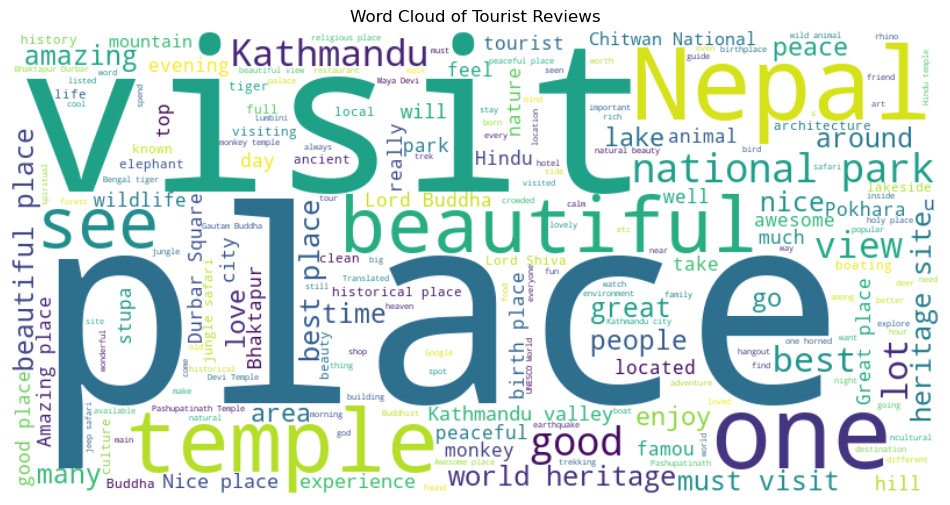

In [16]:
from wordcloud import WordCloud


all_reviews = ' '.join(dataset['review'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)


plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tourist Reviews')
plt.show()

In [6]:
dataset.head()


,ID,name,location,total review,review
0,1,Shreeyansh Bothara,Syambhunath,46 reviews,It is at the top of valleys mountain. Best pl...
1,2,Soumya Senapati,Syambhunath,132 reviews,This place has a significant importance in Bud...
2,3,Aashish Kaji,Syambhunath,298 reviews,Visited this from the other side on a rainy ev...
3,4,Michael Rowarth,Syambhunath,247 reviews,A beautiful temple situated in the capital wit...
4,5,Shashi Acharya,Syambhunath,69 reviews,"great, beautiful, historic & religious place....."


In [8]:
print(dataset.shape)

(7271, 5)


In [9]:
print(dataset.describe)

<bound method NDFrame.describe of         ID                name     location  total review  \
0        1  Shreeyansh Bothara  Syambhunath    46 reviews   
1        2     Soumya Senapati  Syambhunath   132 reviews   
2        3        Aashish Kaji  Syambhunath   298 reviews   
3        4     Michael Rowarth  Syambhunath   247 reviews   
4        5      Shashi Acharya  Syambhunath    69 reviews   
...    ...                 ...          ...           ...   
7266  7267    Swarnim Adhikari      Pokhara     9 reviews   
7267  7268     Deepak Gundecha      Pokhara     3 reviews   
7268  7269           Kartika C      Pokhara    79 reviews   
7269  7270  avinash shrivastav      Pokhara    14 reviews   
7270  7271       Apoorva Xerox      Pokhara    58 reviews   

                                                 review  
0     It is at the top of valleys mountain.  Best pl...  
1     This place has a significant importance in Bud...  
2     Visited this from the other side on a rainy ev...  
3